# **Preprocessing**

### **Install Library**

In [ ]:
# Install Tesseract package
!apt-get install -y tesseract-ocr
# Install pytesseract
!pip install pytesseract
# Install Tesseract data files for Vietnamese language
!apt-get install -y tesseract-ocr-vie

In [ ]:
# Install library for converting pdf to jpg
!pip install pdf2image
!apt-get install -y poppler-utils

In [ ]:
!pip install pdfminer

In [ ]:
pip install pdfminer.six

In [ ]:
pip install PyPDF2

In [ ]:
pip install PyMuPDF

### **Library**

In [ ]:
from pdfminer.high_level import extract_pages
from pdfminer.layout import LTTextContainer, LTChar, LTLine, LAParams
import os
import pandas as pd
import PyPDF2
import fitz 

In [ ]:
from pdf2image import convert_from_path
from PIL import Image
import matplotlib.pyplot as plt
import pytesseract

In [ ]:
import pytesseract
import PIL.Image
import cv2

In [ ]:
from pytesseract import Output

In [ ]:
import re

### **Define path**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Detect types of pdf**

In [ ]:
path = "/content/drive/MyDrive/Research - CSR_NLP/Thu thập dữ liệu/3. NGÂN HÀNG TMCP Á CHÂU/3. NGÂN HÀNG TMCP Á CHÂU - 2014.pdf"

In [ ]:
# Read PDF file
def read_pdf_content(file_path):
    with open(file_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        num_pages = len(pdf_reader.pages)
        text_content = ''
        for page in range(num_pages):
            page_obj = pdf_reader.pages[page]
            text_content += page_obj.extract_text()
        return text_content

In [ ]:
'''
    Analyze the PDF content:
        *Image-only PDF: If the extracted text content is empty => image-only
        *Digitally created PDF: If the extracted text content is not empty & the PDF file does not contain scanned images or picture => digitally created pdf
        *Searchable PDF: If the extracted text content is not empty & the PDF file contains searchable text => searchable pdf
'''
def is_image_only_pdf(file_path):
    content = read_pdf_content(file_path)
    return len(content.strip()) == 0

def is_digitally_created_pdf(file_path):
    content = read_pdf_content(file_path)
    return len(content.strip()) > 0

# def is_searchable_pdf(file_path):
#     content = read_pdf_content(file_path)
#     return len(content.strip()) > 0

In [ ]:
'''
    Create a dataframe containing the type of pdf files
'''
# Path to the folder containing the PDF files
folder_path = "/content/drive/MyDrive/Research - CSR_NLP/Thu thập dữ liệu/"

# Initialize an empty list to store the data
data = []

# Iterate through the folders and PDF files
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".pdf"):
            # Create the file path
            file_path = os.path.join(root, file)
            
            # Determine the type of PDF
            if is_digitally_created_pdf(file_path):
                pdf_type = "Digitally Created PDF"
            elif is_image_only_pdf(file_path):
                pdf_type = "Image-Only PDF"
            else:
                pdf_type = "Unknown"
            
            # Extract the company name from the file path
            company_name = root.split("/")[-1]
            
            # Append the data to the list
            data.append({"Name": file, "Type of PDF": pdf_type, "Path": file_path})
            print(file)

# Create the dataframe
df = pd.DataFrame(data)
df

In [ ]:
'''
    Create a dataframe containing the type of pdf files
'''
# Path to the folder containing the PDF files
folder_path = "/content/drive/MyDrive/Research - CSR_NLP/CSR filtered/"

# Initialize an empty list to store the data
data = []

# Iterate through the folders and PDF files
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".pdf"):
            # Create the file path
            file_path = os.path.join(root, file)
            print(file)
            try:
                # Determine the type of PDF
                if is_digitally_created_pdf(file_path):
                    pdf_type = "Digitally Created PDF"
                elif is_image_only_pdf(file_path):
                    pdf_type = "Image-Only PDF"
                else:
                    pdf_type = "Unknown"
            
                # Extract the company name from the file path
                company_name = root.split("/")[-1]
            
                # Append the data to the list
                data.append({"Name": file, "Type of PDF": pdf_type, "Path": file_path})
                print(file)
            except Exception as e:
                print(f"Error processing file: {file} - {str(e)}")

# Create the dataframe
df = pd.DataFrame(data)
df

In [ ]:
df.to_excel("/content/drive/MyDrive/Research - CSR_NLP/CSR Pdf Types.xlsx", index=False)

In [ ]:
df.to_excel("/content/drive/MyDrive/Research - CSR_NLP/Pdf Types.xlsx", index=False)

### **Load pdf type list**

In [ ]:
df_full = pd.read_excel("/content/drive/MyDrive/Research - CSR_NLP/Pdf Types.xlsx")

In [ ]:
df_csr = pd.read_excel("/content/drive/MyDrive/Research - CSR_NLP/CSR Pdf Types.xlsx")
df_csr

,Name,Type of PDF,Path
0,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/CSR ...
1,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/CSR ...
2,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/CSR ...
3,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/CSR ...
4,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/CSR ...
...,...,...,...
254,8. NGÂN HÀNG TMCP BƯU ĐIỆN LIÊN VIỆT -...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/CSR ...
255,8. NGÂN HÀNG TMCP BƯU ĐIỆN LIÊN VIỆT -...,Image-Only PDF,/content/drive/MyDrive/Research - CSR_NLP/CSR ...
256,8. NGÂN HÀNG TMCP BƯU ĐIỆN LIÊN VIỆT -...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/CSR ...
257,8. NGÂN HÀNG TMCP BƯU ĐIỆN LIÊN VIỆT -...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/CSR ...


### **Extract text from Image-Only Pdf**

In [ ]:
images = convert_from_path(path)
for i, image in enumerate(images):
    image.save(f"output_page_{i+1}.jpg", "JPEG")

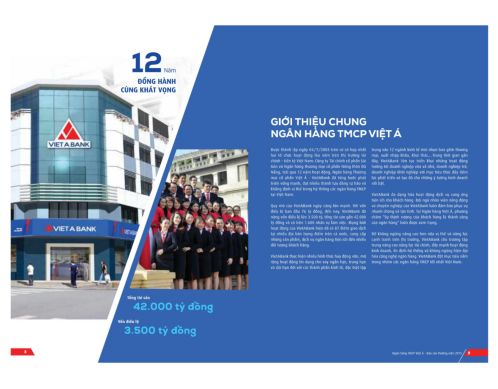

In [ ]:
image = Image.open('output_page_5.jpg')

plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

In [ ]:
myconfig = r'--psm 11 --oem 3'

In [ ]:
from google.colab.patches import cv2_imshow

img = cv2.imread('output_page_5.jpg')
height, width, _ = img.shape

data = pytesseract.image_to_data(img, config = myconfig, output_type = Output.DICT)
print(data)

In [ ]:
print(data['text'])

In [ ]:
amount_boxes = len(data['text'])
for i in range(amount_boxes):
    if float(data['conf'][i]) > 50:
        (x, y, width, height) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        img = cv2.rectangle(img, (x, y), (x+width, y+height), (0,255,0), 2)
        img = cv2.putText(img, data['text'][i], (x, y+height+20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2, cv2.LINE_AA)

cv2_imshow(img)
cv2.waitKey(0)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# boxes = pytesseract.image_to_boxes(img, config=myconfig)
# for box in boxes.splitlines():
#     box = box.split(' ')
# cv2_imshow(img)
# cv2.waitKey(0)

### **Extract text from Digitally Created Pdf**

In [ ]:
df_full = df_full[df_full['Type of PDF'] == 'Digitally Created PDF']
df_full.reset_index()
df_full.head(10)

,Name,Type of PDF,Path
0,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/Thu ...
1,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/Thu ...
2,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/Thu ...
3,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/Thu ...
4,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/Thu ...
5,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/Thu ...
6,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/Thu ...
7,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/Thu ...
8,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/Thu ...
9,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/Thu ...


In [ ]:
df_csr = df_csr[df_csr['Type of PDF'] == 'Digitally Created PDF']
df_csr.reset_index()
df_csr.head(10)

,Name,Type of PDF,Path
0,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/CSR ...
1,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/CSR ...
2,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/CSR ...
3,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/CSR ...
4,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/CSR ...
5,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/CSR ...
6,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/CSR ...
7,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/CSR ...
8,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/CSR ...
9,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG...,Digitally Created PDF,/content/drive/MyDrive/Research - CSR_NLP/CSR ...


##### **Define Extract text function**

In [ ]:
'''
Extract plain text: Create a dataframe contains "company_name", "year", "size", "text"
  - Input: Path of pdf files
  - Output: Dataframe
'''
def extract_text_to_df(path):
    Extract_Data = []

    for page_layout in extract_pages(path):
        for element in page_layout:
            if isinstance(element, LTTextContainer):
                if isinstance(element, LTTextContainer):
                    font_sizes = []
                    for text_line in element:
                        if isinstance(text_line, LTTextContainer):
                            for character in text_line:
                                if isinstance(character, LTChar):
                                    font_sizes.append(character.size)
                    if font_sizes:
                        average_font_size = round(sum(font_sizes) / len(font_sizes))
                        Extract_Data.append([average_font_size, element.get_text()])
    
    # Extract the year using regular expression
    year_match = re.search(r'\b(\d{4})\b', path)
    year = year_match.group(1) if year_match else None
    # Extract the name by splitting the path
    name = path.split('/')[-2]
    # Create a dataframe
    text_df = pd.DataFrame(Extract_Data, columns = ['size', 'text'])
    text_df['year'] = year
    text_df['company_name'] = name
    text_df = text_df[['company_name', 'year', 'size', 'text']]
    
    return text_df

In [ ]:
'''
Filter to only select the most frequent size (or sizes with cummulative percentage < 80%)
'''
def filter_size(df):
    # Calculate the size counts & their cummulative percentage
    size_counts = df['size'].value_counts()
    cumulative_percentage = size_counts.cumsum() / size_counts.sum()
    # Filter sizes that meet the 80% threshold
    selected_sizes = size_counts[cumulative_percentage <= 0.8].index.tolist()

    # Check if the selected sizes list is empty
    if not selected_sizes:
        # Select the size with the highest count if available, or assign an arbitrary default size
        if size_counts.empty:
            default_size = 9  # Set a default font size if there are no sizes
            selected_sizes = [default_size]
        else:
            selected_sizes = [size_counts.idxmax()]
            
    # Filter the DataFrame based on the selected sizes
    df = df[df['size'].isin(selected_sizes)]
    return df

In [ ]:
'''
Filter text that contain '.'
'''
def filter_sentence(df):
    df = df[df['text'].str.contains(r'\.')]
    df = df[~df['text'].str.match(r'^[\d\s\n.]+$')]
    df = df[~df['text'].str.match(r'^\d+\.*')]
    df = df[~df['text'].str.contains(r'^\(\d+(\.\d+)*\)$')]
    df['text'] = df['text'].str.replace(r'(\d+)\.(\d+)', r'\1\2')
    df = df.reset_index(drop=True)
    return df

In [ ]:
'''
Create df with each sentence per rows:
1) Stack text into 1
2) Split by '.'
'''
def extract_final(path):
    # Process previous function    
    df = extract_text_to_df(path)
    df = filter_size(df)
    df = filter_sentence(df)

    # Stack text into one & Split
    stacked_text = ' '.join(df['text']).replace('\n', ' ').replace('\t', ' ').split('.')
    split_text = [text.strip() for text in stacked_text if text.strip()]
    split_text = [text + '.' for text in split_text]

    # Create name & year variable
    name = path.split('/')[-2]
    year_match = re.search(r'\b(\d{4})\b', path)
    year = year_match.group(1) if year_match else None

    # Create new dataframe
    new_df = pd.DataFrame({
        'name': name,
        'year': year,
        'text': split_text,
        'label': ''
    }) 

    new_df = new_df.drop_duplicates()
    new_df = new_df.reset_index(drop = True)
    return new_df

In [ ]:
# df = extract_final(path)

<ipython-input-65-3dfbaa53b0fb>:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[~df['text'].str.contains(r'^\(\d+(\.\d+)*\)$')]
<ipython-input-65-3dfbaa53b0fb>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'(\d+)\.(\d+)', r'\1\2')


In [ ]:
# df.to_excel('/content/drive/MyDrive/Research - CSR_NLP/test.xlsx', index = False)

###### For csr pdf file

In [ ]:
# Create an empty dataframe to store the concatenated outputs
full_df_csr = pd.DataFrame()

# Iterate over each path in the 'Path' column
for path in df_csr['Path']:
    # Call the extract_text() function and store the result in a temporary dataframe
    result_df = extract_final(path)
    # Concatenate the temporary dataframe with the existing full_df
    full_df_csr = pd.concat([full_df_csr, result_df], ignore_index=True)

In [ ]:
full_df_csr

,name,year,text,label
0,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG,2011,Sau khi HĐQT chính thức ban hành Sơ đồ cơ cấu ...,
1,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG,2011,"Với mô hình này, một số phòng, ban, trung...",
2,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG,2011,"Các phòng, trung tâm thuộc khối bao gồm: Trun...",
3,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG,2011,"Tính đến ngày 31/12/2011, tổng huy động ...",
4,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG,2011,"Trong đó, huy động tiết kiệm từ dân cư đạt 18...",
...,...,...,...,...
21092,8. NGÂN HÀNG TMCP BƯU ĐIỆN LIÊN VIỆT,2022,� Tài trợ xây dưng trường học tại tỉnh Quảng ...,
21093,8. NGÂN HÀNG TMCP BƯU ĐIỆN LIÊN VIỆT,2022,"Trà Vinh, T.",
21094,8. NGÂN HÀNG TMCP BƯU ĐIỆN LIÊN VIỆT,2022,Điện Biên.,
21095,8. NGÂN HÀNG TMCP BƯU ĐIỆN LIÊN VIỆT,2022,Từ năm thành lập 2008 đến tháng 12/2022...,


In [ ]:
# Split the dataframe into four equal subsets
subset_size = len(full_df_csr) // 5
subset_1 = full_df_csr.iloc[:subset_size]
subset_2 = full_df_csr.iloc[subset_size:2*subset_size]
subset_3 = full_df_csr.iloc[2*subset_size:3*subset_size]
subset_4 = full_df_csr.iloc[3*subset_size:4*subset_size]
subset_5 = full_df_csr.iloc[4*subset_size:]

In [ ]:
'''
Tien: csv
Thanh: csv
Huyen: csv
Thu: excel
Duy: excel
'''
subset_1.to_csv('/content/drive/MyDrive/Research - CSR_NLP/Text Annotation/Tien.csv', index=False)
subset_2.to_csv('/content/drive/MyDrive/Research - CSR_NLP/Text Annotation/Thanh.csv', index=False, escapechar='\\')
subset_3.to_csv('/content/drive/MyDrive/Research - CSR_NLP/Text Annotation/Huyen.csv', index=False, escapechar='\\')
subset_4.to_excel('/content/drive/MyDrive/Research - CSR_NLP/Text Annotation/Thu.xlsx', index=False)

In [ ]:
subset_5.to_excel('/content/drive/MyDrive/Research - CSR_NLP/Text Annotation/Duy.xlsx', index=False)

###### For full pdf file

In [ ]:
# Create an empty dataframe to store the concatenated outputs
full_df = pd.DataFrame()

# Iterate over each path in the 'Path' column
for path in df_full['Path']:
    # Call the extract_text() function and store the result in a temporary dataframe
    result_df = extract_final(path)
    # Concatenate the temporary dataframe with the existing full_df
    full_df = pd.concat([full_df, result_df], ignore_index=True)

In [ ]:
full_df

,name,year,text,label
0,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG,2017,"Thân gửi Quý cổ đông, Quý khách hàng và Đối tác.",
1,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG,2017,Năm 2017 là năm cuối trong lộ trình triển khai...,
2,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG,2017,"Thay mặt Hội đồng Quản trị và Ban Điều hành, ...",
3,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG,2017,"Đặc biệt hơn, VPBank đã niêm yết thành công c...",
4,1. NGÂN HÀNG TMCP VIỆT NAM THỊNH VƯỢNG,2017,Trong bối cảnh các yêu cầu kiện toàn về bộ má...,
...,...,...,...,...
184341,8. NGÂN HÀNG TMCP BƯU ĐIỆN LIÊN VIỆT,2022,Bảng dưới đây trình bày phân tích tài sản và n...,
184342,8. NGÂN HÀNG TMCP BƯU ĐIỆN LIÊN VIỆT,2022,"Trong thực tế, kỳ đáo hạn thực tế của tài sản...",
184343,8. NGÂN HÀNG TMCP BƯU ĐIỆN LIÊN VIỆT,2022,Cho đến ngày lập báo cáo tài chính này không c...,
184344,8. NGÂN HÀNG TMCP BƯU ĐIỆN LIÊN VIỆT,2022,"Trong năm kết thúc ngày 31 tháng 12 năm 2022, ...",


In [ ]:
full_df.to_excel('/content/drive/MyDrive/Research - CSR_NLP/full_text.xlsx')